   FIPS           NAME      ACRES    SHAPE_AREA     SHAPE_LEN  \
0    33  NEW HAMPSHIRE  5935592.8  2.401324e+10  9.028755e+05   
1     0        VERMONT  6138697.6  2.486846e+10  8.630178e+05   
2    25  MASSACHUSETTS  5104241.5  2.063503e+10  1.442175e+06   
3     9    CONNECTICUT  3162420.2  1.279752e+10  6.018469e+05   
4    44   RHODE ISLAND   612942.3  2.477726e+09  3.326268e+05   

                                            geometry  
0  POLYGON ((232399.5 1228114.13, 239250.39 11147...  
1  POLYGON ((199624.3 1195967.25, 197732.75 11944...  
2  POLYGON ((56066.19 945422.5, 75567.55 944418.5...  
3  POLYGON ((35747.43 868247.5, 72026.89 866261.0...  
4  POLYGON ((222557.08 828638.5, 221663.02 827490...  


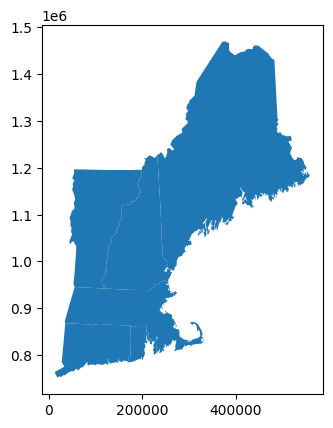

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

new_england = gpd.read_file('shapefiles/NEWENGLAND_POLY.shp')
print(new_england.head())

new_england.plot()
plt.show()

